#  Twitter US Airline Sentiment Using NLTK Library


### Table of Contents

The table of contents for this project is as follows:-
 1. The problem statement
 2. Import libraries
 3. Import dataset
 4. Exploratory data analysis
    - View dimensions of dataset 
    - Preview the dataset
    - View column names
    - Drop variable
    - View summary of dataset
    - View statistical properties of dataset
 5. Data Visualization
 6. Data Cleaning
 7. Preparing Data for Model development 
 8. Split data into training and test set
 9. Model training
 10. Predict results

 11. Check accuracy score
     - Compare train-set accuracy
     - Check for Overfitting and Underfitting
 12. Confusion matrix
 
 13. Classification metrices
     - Classification report
     - Classification accuracy
     - Classification error
     - Precision
     - Recall
     - True Positive Rate
     - False Positive Rate
     - Specificity
     - f1-score
     - Support
     
 14. Adjusting the threshold level
 15. k-Fold Cross Validation
 16. Results and Conclusion
 17. References







### 1. The Problem Statement and Steps

Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, In this project have to categorize the text string into predefined categories. 
Problem Description

Given dataset contains data of tweets on various airline’s twitter handles.

It contains a total of 12 columns, out of which one column specifies the sentiment of tweet. All other columns provide various information related to what was the tweet, where was it posted from, when was it posted, it's retweeted; etc.

This project deals with building  a machine learning model to predict the sentiment of the tweet using air lines dataset from kaggle.

Data Description

Description of columns of the dataset is given below -
- tweet_id -- Id of the tweet
- airline_sentiment -- Sentiment of tweet (Target variable)
- airline_sentiment_confidence -- Confidence with which the given sentiment was determined
- negativereason_confidence -- Confidence with which the negative reason of tweet was predicted
- name -- Name of the person who tweeted
- retweet_count -- Number of retweets
- text -- Text of the tweet whose sentiment has to be predicted
- tweet_created -- Time at which the tweet was created
- tweet_location -- Location from where the tweet was posted
- user_timezone -- Time zone from where the tweet was posted
- negativereason -- Reason for which user posted a negative tweet
- airline -- Airline for which the tweet was posted

Inspiration

The data is a nice combination of Numeric and Non-numeric features. it can be used for sentiment analysis.

### Solution 

To solve this problem, we will follow the typical machine learning pipeline. We will first import the required libraries and the dataset. We will then do exploratory data analysis to see if we can find any trends in the dataset. Next, we will perform text preprocessing to convert textual data to numeric data that can be used by a machine learning algorithm. Finally, we will use machine learning algorithms to train and test our sentiment analysis models.




### 2.  Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 3. Import dataset

In [2]:
data_source_url = "C:\\Users\\LENOVO\\Desktop\\sentiment analysis\\Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

### 4. Exploratory data analysis

In [3]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [5]:
airline_tweets.shape

(14640, 15)

In [6]:
sentiment_counts = airline_tweets.airline_sentiment.value_counts()
number_of_tweets = airline_tweets.tweet_id.count()
print(sentiment_counts)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


It turns out that our dataset is unbalanced with significantly more negative than positive tweets. We will focus on the issue of identifying negative tweets, and hence treat neutral and positive as one class. It's good to keep in mind that, while a terrible classifier, if we always guessed a tweet was negative we'd be right 62.7% of the time (9178 of 14640). That clearly wouldn't be a very useful classifier, but worth to remember.

In [7]:
(len(airline_tweets)-airline_tweets.count())/len(airline_tweets)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [8]:
airline_tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


### 5. Data Visualization

To explore the dataset a bit to see if we can find any trends. But before that, we will change the default plot size to have a better view of the plots. Execute the following script:

In [9]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


Let's first see the number of tweets for each airline. We will plot a pie chart for that:

In this graph we can observe the percentage of public tweets for each airline. United Airline has the highest number of tweets i.e. 26%, followed by US Airways (20%).

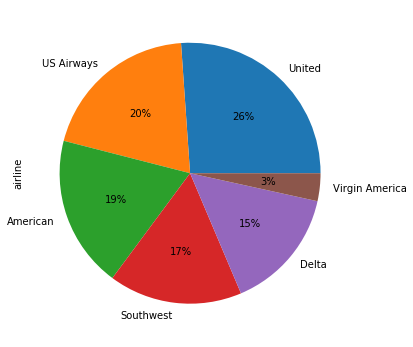

In [10]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

### Airline sentiments for each airline

- Firstly lets calculate the total number of tweets for each airline
- Then, we are going to get the barplots for each airline with respect to sentiments of tweets (positive,negative or neutral).
- This will give us a clearer idea about the airline sentiments , airlines relationship. 

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


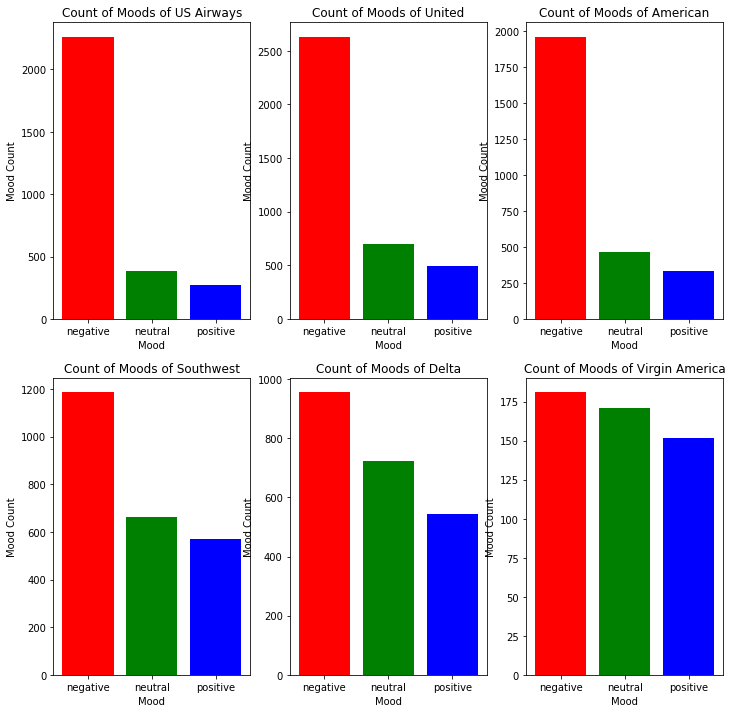

In [11]:
# Plotting the distribution of sentiment for each individual airline
print("Total number of tweets for each airline \n ",airline_tweets.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=airline_tweets[airline_tweets['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

So, It is evident from the output that for almost all the airlines, the majority of the tweets are negative, followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.

Plotting the distribution of sentiments across all the tweets:



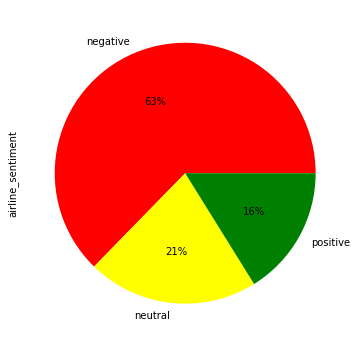

In [12]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In this graph I observe that the majority of the tweets are negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).


Finally, By using the Seaborn library to view the average confidence level for the tweets belonging to three sentiment categories.

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


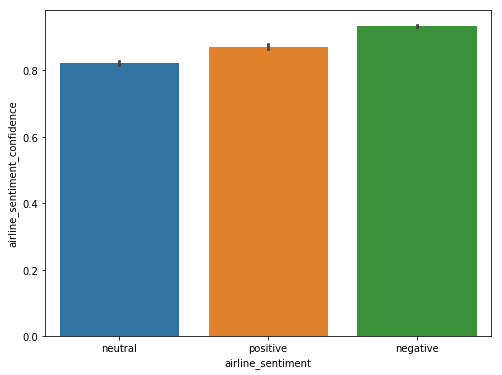

In [13]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

From the output, you can see that the confidence level for negative tweets is higher compared to positive and neutral tweets.

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


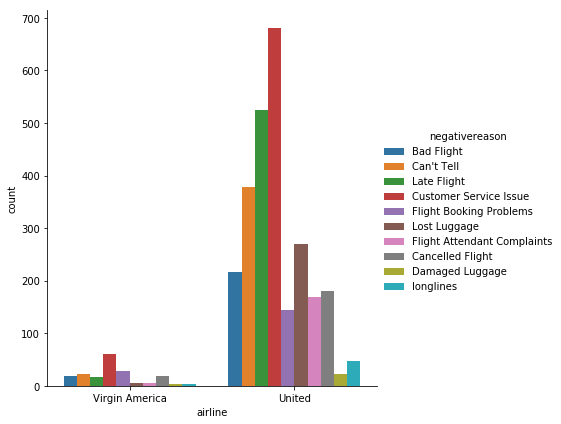

In [14]:
#Visualizing 'negativereason' and 'airline'
sns.factorplot(x = 'airline',data=airline_tweets,
               order = ['Virgin America','United'],kind ='count',hue='negativereason',size=6,aspect=0.9)
plt.show()

### 6. DATA CLEANING

- Tweets contain many slang words and punctuation marks. We need to clean our tweets before they can be used for training the machine learning model. 
- However, before cleaning the tweets, let's divide our dataset into feature and label sets.Our feature set will consist of tweets only.
- If we look at our dataset, the 11th column contains the tweet text. 
- So the index of the column will be 10 since pandas columns follow zero-based indexing scheme where the first column is called 0th column. 
- Our label set will consist of the sentiment of the tweet that we have to predict. The sentiment of the tweet is in the second column (index 1). To create a feature and a label set, we can use the iloc method off the pandas data frame.


iloc Method: Pandas provide a unique method to retrieve rows from a Data frame. Dataframe.iloc[] method is used when the index label of a data frame is something other than numeric series of 0, 1, 2, 3….n or in case the user doesn’t know the index label. Rows can be extracted using an imaginary index position which isn’t visible in the data frame.

Steps in Data Cleaning
 - Remove all the special characters
 - Remove all single characters
 - Remove single characters from the start
 - Substituting multiple spaces with single space

Here in this Project, tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data. It will be better to delete these columns as they will not provide any constructive information.

In [15]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [16]:
del airline_tweets['tweet_coord']
del airline_tweets['airline_sentiment_gold']
del airline_tweets['negativereason_gold']
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In this project to clean data. I'm using regular expressions

In [17]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

### 7. Preparing Data for Model development 


### Bag of Words

Bag of words scheme is the simplest way of converting text to numbers.
In the bag of words approach the first step is to create a vocabulary of all the unique words. 
The next step is to convert each document into a feature vector using the vocabulary. The length of each feature vector is equal to the length of the vocabulary. The frequency of the word in the document will replace the actual word in the vocabulary. If a word in the vocabulary is not found in the corresponding document, the document feature vector will have zero in that place


In [18]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

The goal is to firstly get an idea of the most frequent words in negative tweets.
Get idea about most frequent words in positive tweets.

### 8. Split data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

### 9. Model training

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

### Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

text_classifier = MultinomialNB().fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

### Logistic Regression

In [ ]:
import sklearn as sk
import os
from sklearn.linear_model import LogisticRegression
text_classifier = LogisticRegression().fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

### Neural_network

In [ ]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

text_classifier = MLPClassifier().fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

In [ ]:
### 10. Predicting results

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

### 11. Check accuracy score
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

The training-set accuracy score is 0.8239 while the test-set accuracy to be 0.7797. These two values are quite comparable. So, there is no question of overfitting.

### 12. Confusion matrix

### Confusion matrix 
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

- ***True Positives (TP)*** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- ***True Negatives (TN)*** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.
- ***False Positives (FP)*** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.
- ***False Negatives (FN)*** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called ***Type II error***.
- These four outcomes are summarized in a confusion matrix given below.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# It is a Ternary Classification Problem
### for the above 3 X 3 confusion matrix 
### After calculating Weighted average precision and Weighted average recall
      - I got the same value that is 0.77


The confusion matrix shows 1764 + 261 = 2,025 correct predictions and 83 + 311 = 394 incorrect predictions.

### 13. Classification Metrices

### Classification Report 
***Classification report*** is another way to evaluate the classification model performance. It 
displays the precision, recall, f1 and support scores for the model. I have described these 
terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

### Classification Accuracy 

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

### Classification Error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.for mat(classification_error))

### Precision 

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

### Recall 

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). ***Recall*** is also called ***Sensitivity***.

***Recall*** identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

### True Positive Rate
True Positive Rate is synonymous with Recall.


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

### f1-score

***f1-score*** is the weighted harmonic mean of precision and recall. The best possible ***f1-score*** would be 1.0 and the worst would be 0.0. ***f1-score*** is the harmonic mean of precision and recall. So, ***f1-score*** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of ***f1-score*** should be used to compare classifier models, not global accuracy.

### Support
Support is the actual number of occurrences of the class in our dataset.

### 14. Adjusting the threshold level

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

### Observations
In each row, the numbers sum to 1.

- There are 3 columns which correspond to 3 classes negative, neutral and positive.
  - Class 0 - predicted probability that it is negative.
  - Class 1 - predicted probability that it is neutral.
  - Class 2 - predicted probability that it is positive.
- Importance of predicted probabilities
  - We can rank the observations by probability of negative,neutral and positive.
- predict_proba process
  - Predicts the probabilities
  - Choose the class with the highest probability

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Negative (0)', 'Prob of - Neutral (1)', 'Prob of - Positive (2)'])

y_pred_prob_df

In [ ]:
# store the predicted probabilities for class 1 - Probability of Neutral
y_pred1 = logreg.predict_proba(X_test)[:, 1]

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities')
plt.ylabel('Frequency')

### Observations
- We can see that the above histogram is highly positive skewed.
- The first column tell us that there are approximately 800 observations with probability between 0.0 and 0.1.
- There are small number of observations with probability > 0.8
- So, these small number of observations predict that there are few positive feedbacks
- Majority of observations predict that there are negative feedbacks.

### 15. k-Fold Cross Validation

In [ ]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

We can summarize the cross-validation accuracy by calculating its mean.

In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Our, original model score is found to be 0.7797. The average cross-validation score is 0.7760. So, we can conclude that cross-validation does not result in performance improvement.

### 16. Results and Conclusion

- The logistic regression model accuracy score is 0.7797. So, the model does a very good job in prediction.
- Small number of observations predict that there are positive feedbacks. Majority of observations predict that there negative and neutral.
- The model shows no signs of overfitting.
- Our, original model score is found to be 0.7797. The average cross-validation score is 0.7760. So, we can conclude that cross-validation does not result in performance improvement.

### 17. References
The work done in this project is inspired from the following books and websites:-
- Introduction to Machine Learning with Python by Andreas C Muller and Sarah Guido.
- Udemy course – Feature Engineering for Machine Learning by Soledad Galli.